**CURSO**: Análisis Geoespacial, Departamento de Geociencias y Medio Ambiente, Universidad Nacional de Colombia - sede Medellín <br/>
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources, such as Erdogan Taskesen in [Towardsdatascience](https://towardsdatascience.com/how-to-find-the-best-theoretical-distribution-for-your-data-a26e5673b4bd). Every effort has been made to trace copyright holders of the materials used in this book. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions. 

# Data distribution function

When it comes to data, it is important to explore the fundamental characteristics of the data too, such as skewness, kurtosis, outliers, distribution shape, univariate, bimodal, etc. Based on these characteristics it is easier to decide which models are best to use because most models have prerequisites for the data.

### Histogram
The histogram is a well-known plot in data analysis which is a graphical representation of the distribution of the dataset. The histogram summarizes the number of observations that fall within the bins. Changing the range of the number of bins will help to identify whether the density looks like a common probability distribution by the shape of the histogram. An inspection will also give hints whether the data is symmetric or skewed and whether it has multiple peaks or outliers.

### Cumulative Distribution Function (CDF)

### Quantile-Quantile plot (QQ plot)
The QQ plot compares the empirical probability distributions vs. the theoretical probability distributions by plotting their quantiles against each other. If the two distributions are equal then the points on the QQ-plot will perfectly lie on a straight line y = x.

In [2]:
!pip install distfit

     |████████████████████████████████| 11.8 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 965 kB 64.3 MB/s eta 0:00:01
     |████████████████████████████████| 299 kB 79.6 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3


In the following example, we will generate data from the normal distribution with mean=2 and standard deviation=4. We will use distfit to estimate these two parameters from the data itself. If you already know the family of distributions (e.g., bell-shape), you can specify a subset of distributions. 

In [18]:
# Import libraries
import numpy as np
from distfit import distfit

# Create random normal data with mean=2 and std=4
X = np.random.normal(2, 4, 10000)

# Initialize using the parametric approach.
dfit = distfit(todf=True)

# Alternatively limit the search for only a few theoretical distributions.
dfit = distfit(method='parametric', todf=True, distr=['norm', 'expon'])

# Fit model on input data X.
dfit.fit_transform(X)

# Print the bet model results.
dfit.model

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm ] [0.00 sec] [RSS: 0.000536495] [loc=1.955 scale=3.979]
[distfit] >INFO> [expon] [0.00 sec] [RSS: 0.111364] [loc=-15.776 scale=17.731]
[distfit] >INFO> Compute confidence intervals [parametric]


{'name': 'norm',
 'score': 0.0005364946667356758,
 'loc': 1.954741659360256,
 'scale': 3.9793456170908392,
 'arg': (),
 'params': (1.954741659360256, 3.9793456170908392),
 'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fa87264a610>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': -4.590699411805058,
 'CII_max_alpha': 8.500182730525568}

In [15]:
# Print the scores of the distributions:
dfit = distfit(method='parametric', todf=True)
dfit.fit_transform(X)
dfit.summary[['name', 'score', 'loc', 'scale']];

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0004258] [loc=1.989 scale=4.000]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.10302] [loc=-12.498 scale=14.486]
[distfit] >INFO> [pareto    ] [0.27 sec] [RSS: 0.104904] [loc=-782935904.665 scale=782935892.167]
[distfit] >INFO> [dweibull  ] [0.07 sec] [RSS: 0.00306668] [loc=1.911 scale=3.430]
[distfit] >INFO> [t         ] [0.15 sec] [RSS: 0.000428734] [loc=1.988 scale=3.992]
[distfit] >INFO> [genextreme] [0.24 sec] [RSS: 0.000721722] [loc=0.459 scale=3.942]
[distfit] >INFO> [gamma     ] [0.07 sec] [RSS: 0.000393557] [loc=-139.433 scale=0.113]
[distfit] >INFO> [lognorm   ] [0.31 sec] [RSS: 0.000393789] [loc=-209.997 scale=211.948]
[distfit] >INFO> [beta      ] [0.15 sec] [RSS: 0.00039338] [loc=-136.099 scale=14028438.851]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0744522] [loc=-12.498 scale=30.171]
[distfit] >INFO> [loggamma  ] [0.22 sec] [RSS: 0.000459877] [loc=-900.112 scale=129.

[distfit] >INFO> Ploting Summary.


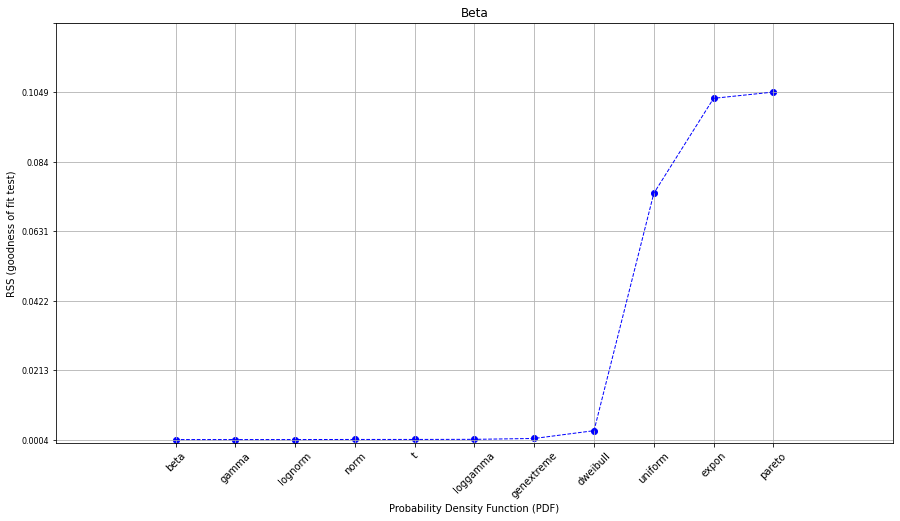

In [16]:
dfit.plot_summary();

The result is that the top 7 distributions have a similar and low RSS score, among them the normal distribution. We can see in the summary statistics that the estimated parameters for the normal distribution are loc=1.98 and scale=3.99, which is very close to our initially generated random sample population (mean=2, std=4). All things considered, A very good result.

[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Beta(loc:-136.099221, scale:14028438.850957)


(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot: title={'center': '\nRSS\nbeta(a=1191.85, b=1.21077e+08, loc=-136.099, scale=1.40284e+07)'}, xlabel='Values', ylabel='Frequency'>)

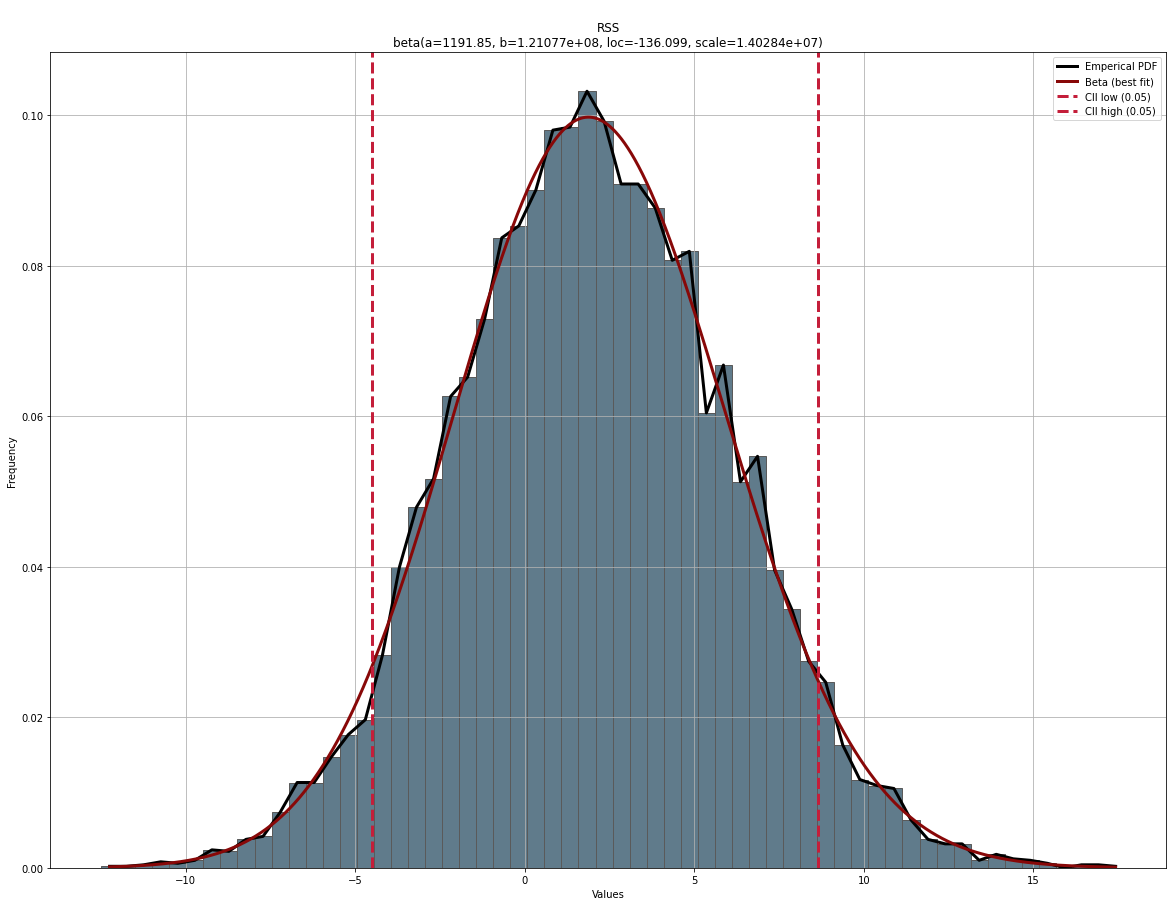

In [17]:
dfit.plot()

In [21]:
y = [3,4,5,6,10,11,12,18,20]
results = dfit.predict(y)

[distfit] >INFO> Compute significance for 9 samples.
[distfit] >INFO> Multiple test correction method applied: [fdr_bh].


[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Mark 5 significant regions
[distfit] >INFO> Estimated distribution: Norm(loc:1.954742, scale:3.979346)


(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot: title={'center': '\nRSS\nnorm(loc=1.95474, scale=3.97935)'}, xlabel='Values', ylabel='Frequency'>)

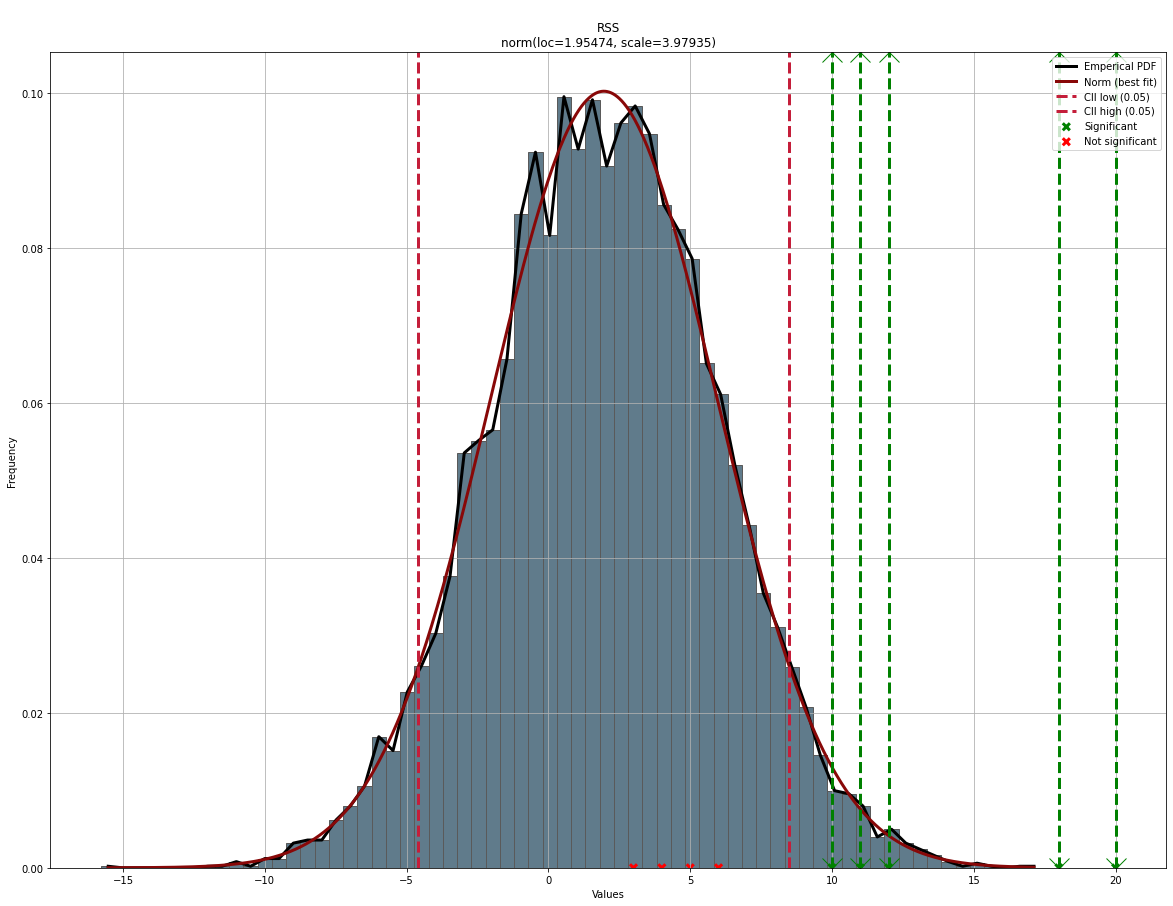

In [22]:
dfit.plot()

In [26]:
# Print the dataframe containing the total information
print(results)

{'y': array([ 3,  4,  5,  6, 10, 11, 12, 18, 20]), 'y_proba': array([3.96402119e-01, 3.41591629e-01, 2.85501279e-01, 2.32020769e-01,
       3.88815851e-02, 2.59009473e-02, 1.73869034e-02, 1.24362997e-04,
       2.59547369e-05]), 'y_pred': array(['none', 'none', 'none', 'none', 'up', 'up', 'up', 'up', 'up'],
      dtype='<U4'), 'P': array([3.96402119e-01, 3.03637003e-01, 2.22056550e-01, 1.54680513e-01,
       2.16008806e-02, 1.15115321e-02, 5.79563448e-03, 2.76362215e-05,
       2.88385966e-06]), 'y_bool': array([False, False, False, False,  True,  True,  True,  True,  True])}


[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00340187] [loc=0.001 scale=2.012]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.174767] [loc=-6.309 scale=6.309]
[distfit] >INFO> [pareto    ] [0.09 sec] [RSS: 0.23852] [loc=-103.856 scale=97.547]
[distfit] >INFO> [dweibull  ] [0.02 sec] [RSS: 0.0416398] [loc=-0.002 scale=1.724]
[distfit] >INFO> [t         ] [0.06 sec] [RSS: 0.00340164] [loc=0.001 scale=2.012]
[distfit] >INFO> [genextreme] [0.07 sec] [RSS: 0.00394318] [loc=-0.745 scale=2.025]
[distfit] >INFO> [gamma     ] [0.07 sec] [RSS: 0.00363902] [loc=-55.894 scale=0.073]
[distfit] >INFO> [lognorm   ] [0.14 sec] [RSS: 0.00353392] [loc=-167.816 scale=167.803]
[distfit] >INFO> [beta      ] [0.04 sec] [RSS: 0.00316223] [loc=-20.323 scale=33.986]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.118082] [loc=-6.309 scale=13.162]
[distfit] >INFO> [loggamma  ] [0.06 sec] [RSS: 0.00327284] [loc=-88.434 scale=19.479]
[distfit] >INFO> Compute 

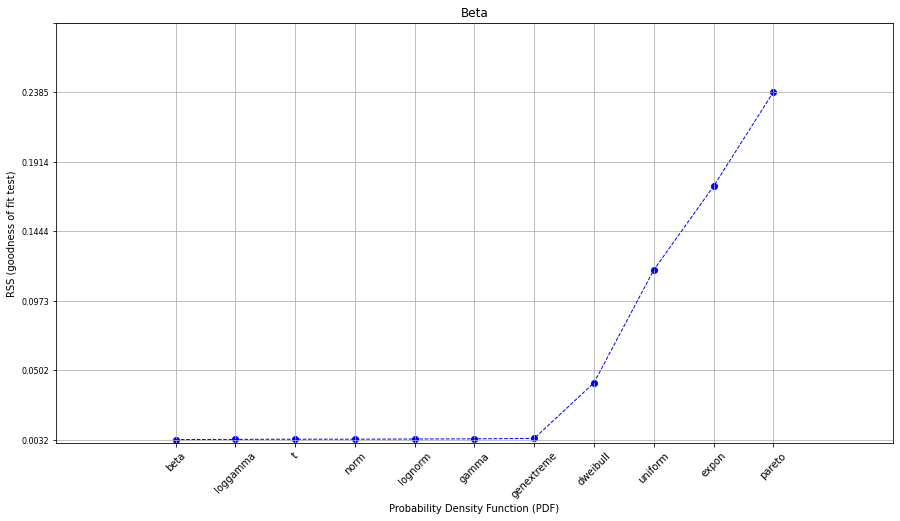

[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Beta(loc:-20.322824, scale:33.986060)
[distfit] >INFO> Compute significance for 9 samples.
[distfit] >INFO> Multiple test correction method applied: [fdr_bh].
[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Mark 5 significant regions
[distfit] >INFO> Estimated distribution: Beta(loc:-20.322824, scale:33.986060)
[distfit] >INFO> Create CDF plot for the parametric method.
[distfit] >INFO> Ploting CDF
[distfit] >INFO> Mark 5 significant regions


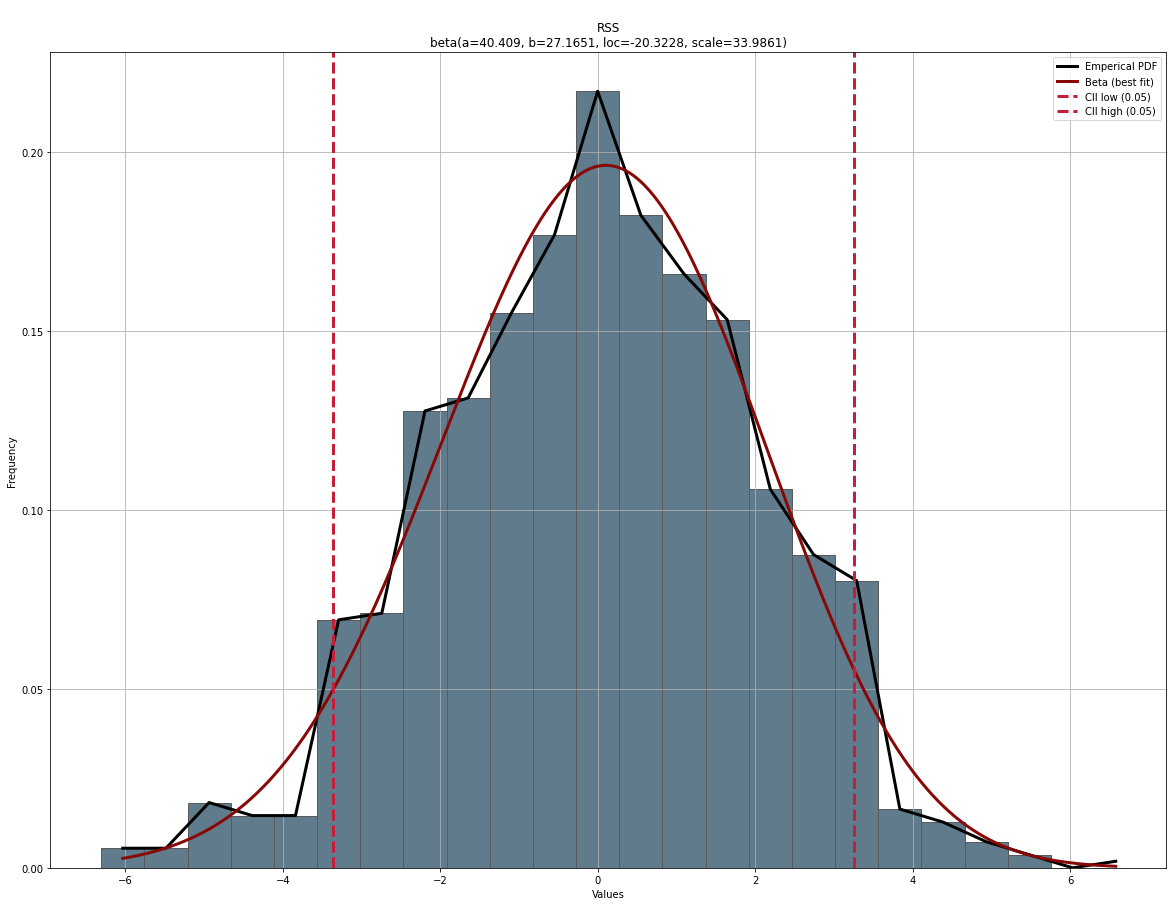

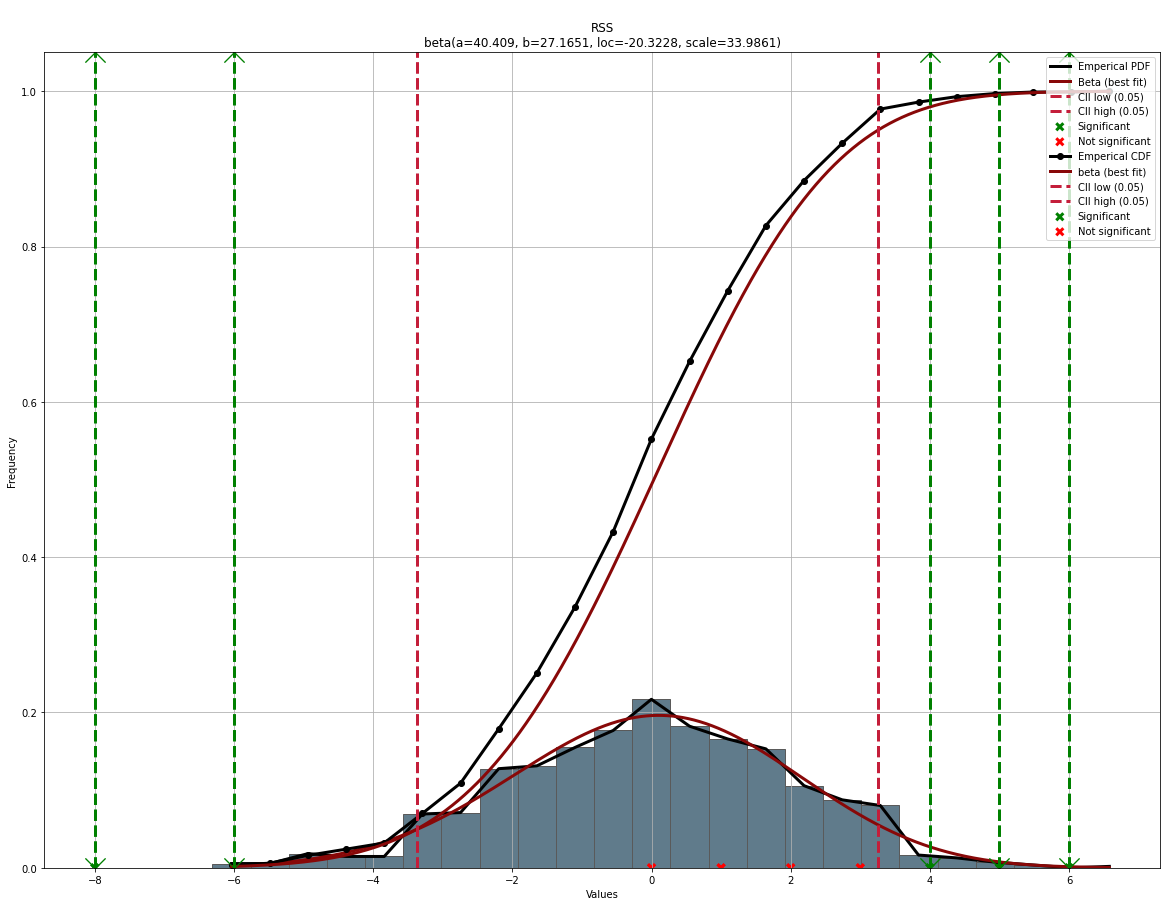

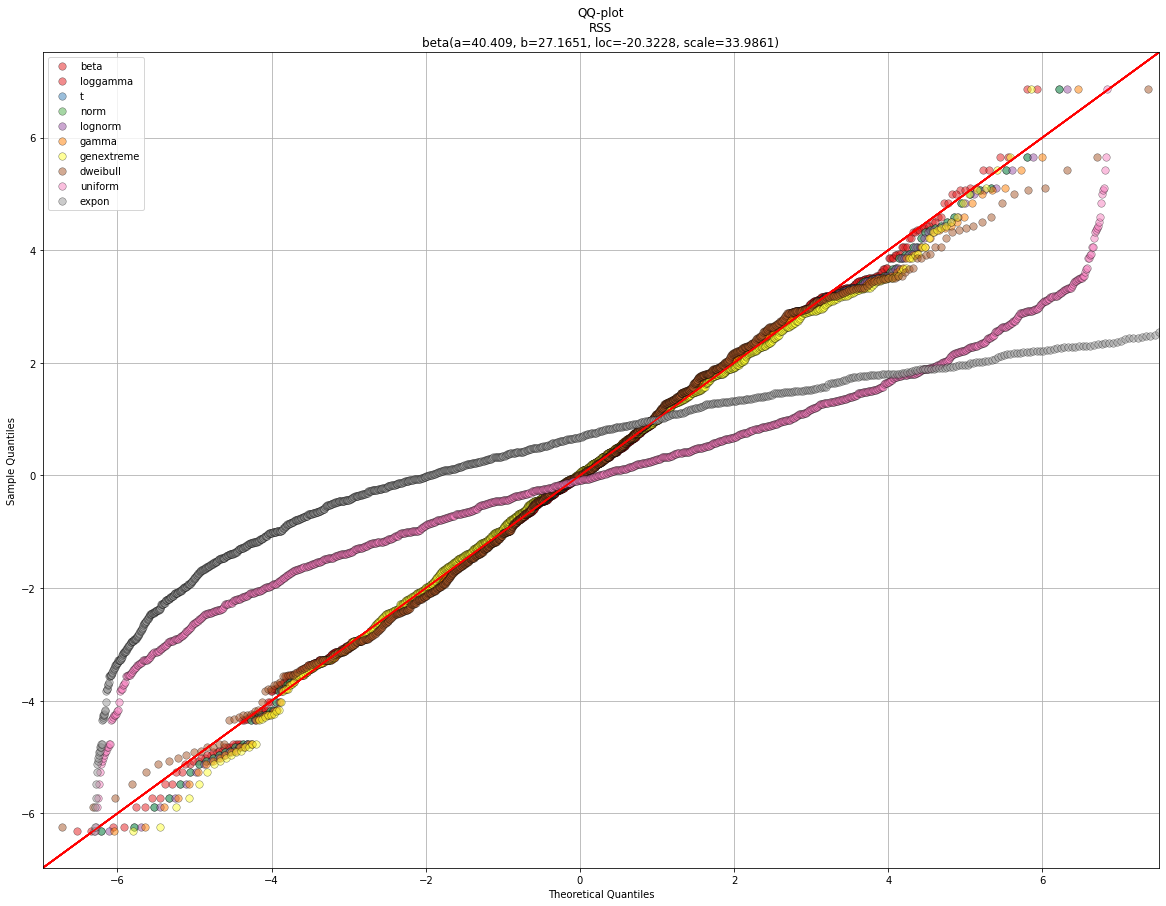

In [28]:

X = np.random.normal(0, 2, 1000)
y = [-8,-6,0,1,2,3,4,5,6]

dfit = distfit()
results = dfit.fit_transform(X)

# Plot summary
dfit.plot_summary()

# PDF plot
dfit.plot()

# Make prediction
results_proba = dfit.predict(y)

# Plot PDF
fig, ax = dfit.plot(chart='PDF', n_top=1)

# Add the CDF to the plot
fig, ax = dfit.plot(chart='CDF', n_top=1, ax=ax)

# QQ-plot for top 10 fitted distributions
fig, ax = dfit.qqplot(X, n_top=10)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> Compute confidence intervals [percentile]
[distfit] >INFO> Create PDF plot for the percentile method.
[distfit] >INFO> Compute significance for 9 samples.
[distfit] >INFO> Create PDF plot for the percentile method.


(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot: xlabel='Values', ylabel='Frequency'>)

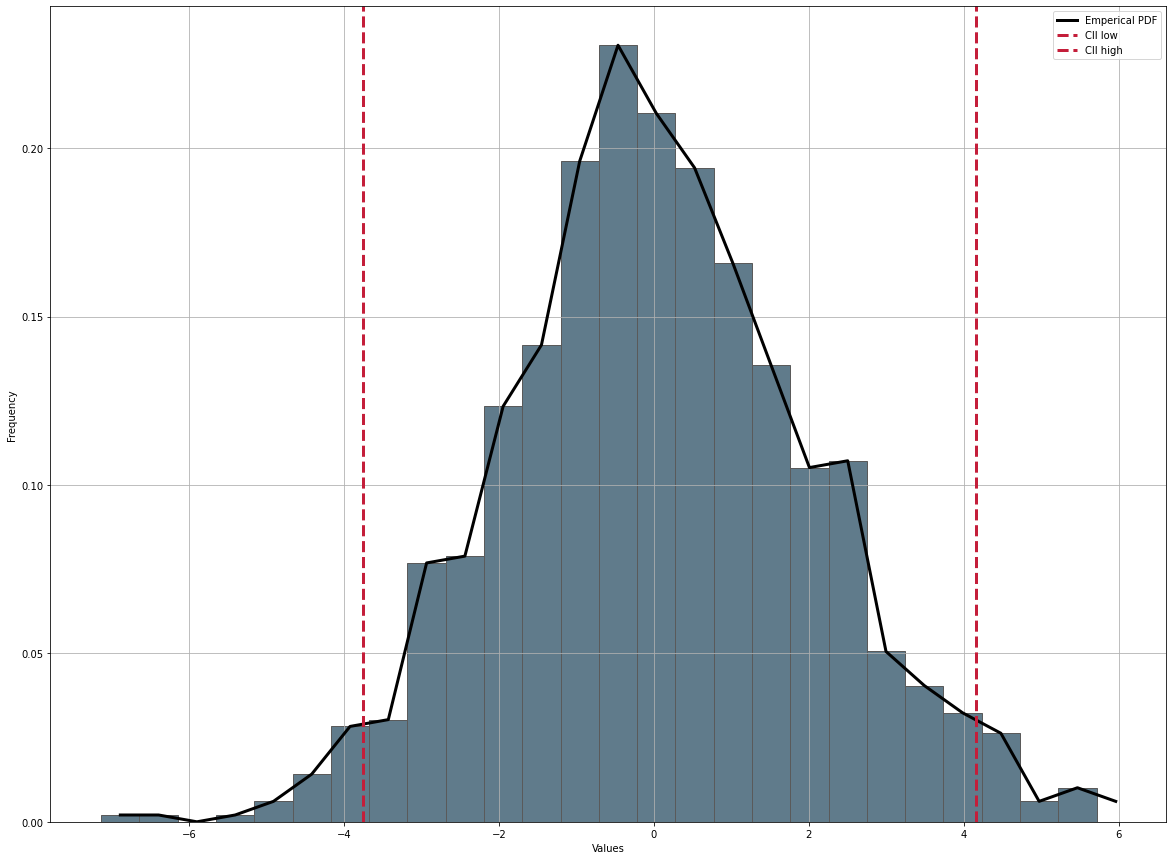

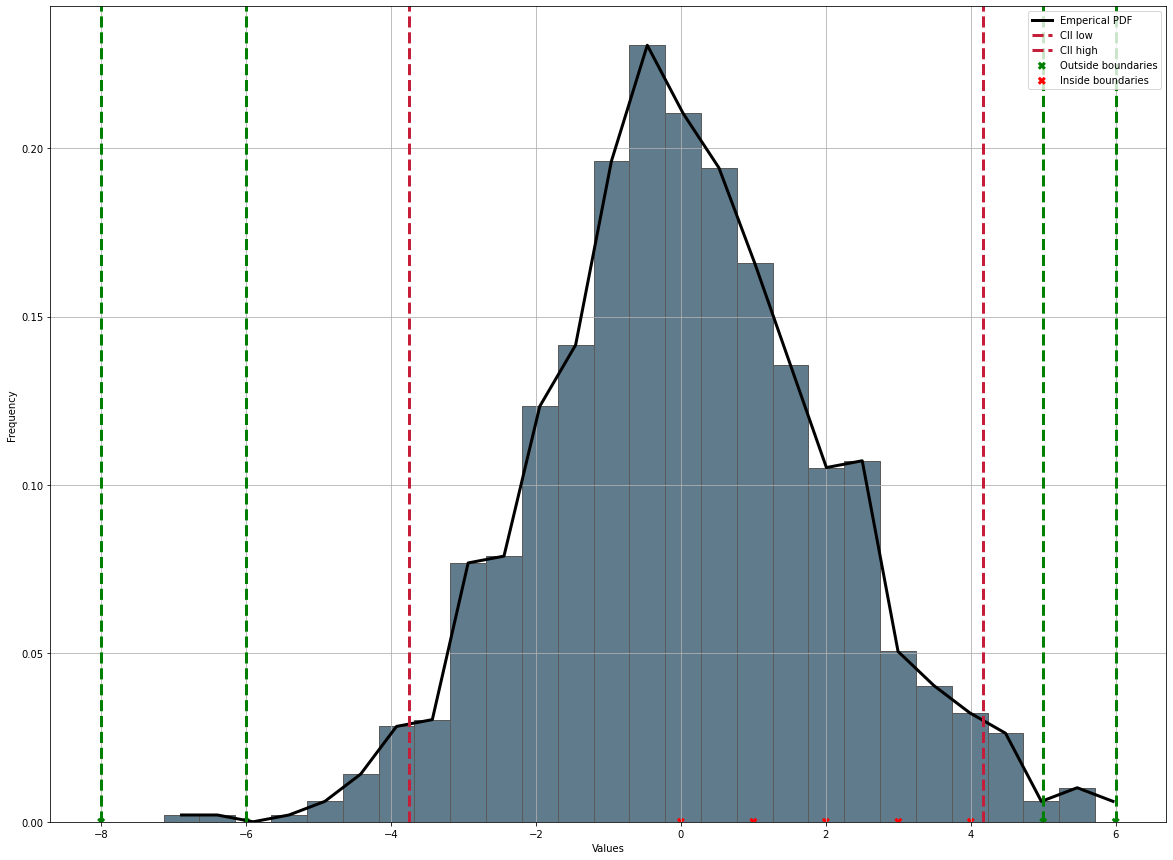

In [29]:
# Create dataset
X = np.random.normal(0, 2, 1000)
y = [-8,-6,0,1,2,3,4,5,6]

# Default method is parametric.
dfit = distfit()

# In case of quantile
dfit = distfit(method='quantile')

# In case of percentile
dfit = distfit(method='percentile')

# Fit using method
model_results = dfit.fit_transform(X)

dfit.plot()

# Make prediction
results = dfit.predict(y)

# Plot results with CII and predictions.
dfit.plot()


## Bootstrapping for more confidence.
We can further validate our fitted model using a bootstrapping approach and the Kolmogorov-Smirnov (KS) test to assess the goodness of fit. If the model is overfitting, the KS test will reveal a significant difference between the bootstrapped samples and the original data, indicating that the model is not representative of the underlying distribution. In distfit, the n_bootst parameter can be set during initialization or afterward (see code section).

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.27 sec] [RSS: 5.90836e-05] [loc=163.056 scale=9.791]
[distfit] >INFO> [expon     ] [0.24 sec] [RSS: 0.0168949] [loc=129.099 scale=33.957]
[distfit] >INFO> [pareto    ] [16.1 sec] [RSS: 0.0187598] [loc=-0.331 scale=129.430]
[distfit] >INFO> [dweibull  ] [7.05 sec] [RSS: 0.000401645] [loc=163.054 scale=8.378]
[distfit] >INFO> [t         ] [16.9 sec] [RSS: 5.90799e-05] [loc=163.056 scale=9.790]
[distfit] >INFO> [genextreme] [54.3 sec] [RSS: 0.000257098] [loc=158.957 scale=9.626] 
[distfit] >INFO> [gamma     ] [12.5 sec] [RSS: 6.17814e-05] [loc=-456.137 scale=0.155]
[distfit] >INFO> [lognorm   ] [27.6 sec] [RSS: 0.0643847] [loc=129.099 scale=3.005]
[distfit] >INFO> [beta      ] [19.0 sec] [RSS: 6.30094e-05] [loc=57.795 scale=232.648]
[distfit] >INFO> [uniform   ] [0.28 sec] [RSS: 0.0116631] [loc=129.099 scale=68.739]
[distfit] >INFO> [loggamma  ] [22.5 sec] [RSS: 5.91826e-05] [loc=-2008.782 scale=313.682]
[dis

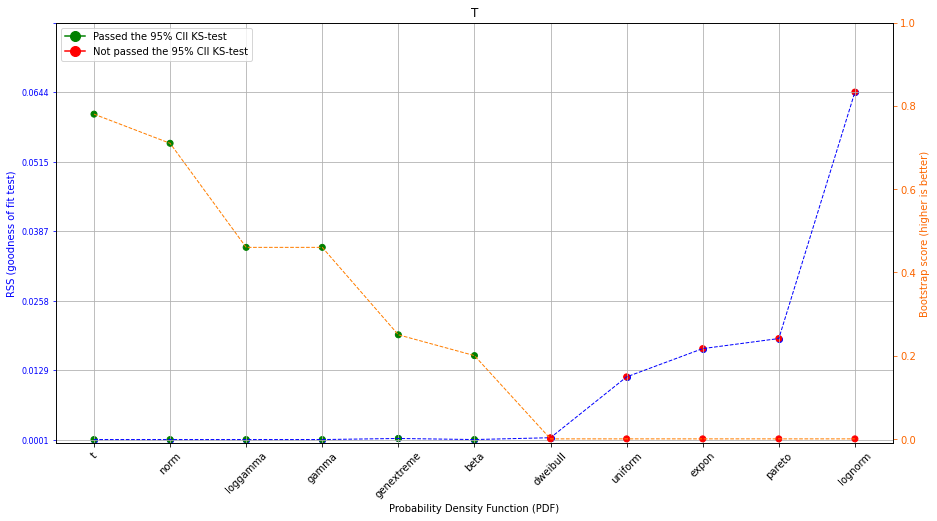

(<Figure size 1080x576 with 2 Axes>,
 <AxesSubplot: title={'center': 'T'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

In [30]:
# Initialize with 100 permutations
dfit = distfit(n_boots=100)

# Random data
# X = np.random.exponential(0.5, 10000)
# X = np.random.uniform(0, 1000, 10000)
X = np.random.normal(163, 10, 10000)

results = dfit.fit_transform(X)

# Results are stored in summary
dfit.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']]

# Create summary plot
dfit.plot_summary()